# Проект: классификация

# "Анализ данных в банковском секторе"
***
#### Добро пожаловать в мой проект, посвященный анализу данных в банковском секторе! В данном проекте я буду исследовать данные маркетинговой кампании банка, которая направлена на привлечение клиентов для открытия депозитов. Моя задача - создать модель машинного обучения, способную предсказать, с какой вероятностью клиенты примут предложение банка.

## Бизнес-задача
#### Банки обладают огромным объемом информации о своих клиентах, и эта информация может быть использована для того, чтобы более эффективно взаимодействовать с клиентами. Нашей целью является выявление характеристик, которые делают клиентов более склонными к открытию депозитов в банке. Это позволит банку оптимизировать маркетинговые кампании и увеличить свою прибыль.

## Цели проекта
### В рамках данного проекта я предприму следующие шаги:

- Первичная обработка данных: обработка пропусков и выбросов в данных.

- Разведывательный анализ данных (EDA): исследование данных, выявление закономерностей и формулирование гипотез.

- Отбор и преобразование признаков: подготовка данных для задачи классификации.

- Решение задачи классификации: построение моделей, включая логистическую регрессию и решающие деревья.

- Решение задачи классификации: использование ансамблей моделей для улучшения прогнозов.

### Я приглашаю вас на этот увлекательный путь анализа данных и создания моделей машинного обучения, который поможет банку повысить эффективность маркетинговых кампаний и лучше понять свою целевую аудиторию. Давайте начнем этот проект и воплотим его в жизнь!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
# Загружаем данные
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
# Находим признак с максимальным количеством пропущенных значений
missing_values = df.isnull().sum()
missing_values

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# Находим уникальные значения в признаке "job"
unique_job_values = df['job'].unique()
unique_job_values

# Ищем значение, которое может быть использовано для кодирования пропущенных значений
for value in unique_job_values:
    if 'unknown' in value.lower():
        missing_value_encoding = value

missing_value_encoding

'unknown'

### Задание 3

In [6]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
# Убираем запятые, пробелы и символы доллара из значений в признаке "balance"
df['balance'] = df['balance'].str.replace(',', '.', regex=True).str.replace(' ', '', regex=True).str.replace('\$', '', regex=True)

# Преобразуем значения в тип float
df['balance'] = df['balance'].astype(float)

# Вычисляем среднее значение
mean_balance = df['balance'].mean()

# Ответ округляем до трех знаков после точки-разделителя
mean_balance_rounded = round(mean_balance, 3)

mean_balance_rounded

1529.129

### Задание 4

In [7]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# Рассчитываем медианное значение по признаку "balance"
median_balance = df['balance'].median()

# Заменяем пропущенные значения на медиану
df['balance'].fillna(median_balance, inplace=True)

# Вычисляем среднее значение по преобразованному признаку "balance"
mean_balance = df['balance'].mean()

# Ответ округляем до трех знаков после точки-разделителя
mean_balance_rounded = round(mean_balance, 3)

mean_balance_rounded


1526.936

### Задание 5

In [8]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# Находим модальные значения для признаков "job" и "education"
mode_job = df['job'].mode()[0]
mode_education = df['education'].mode()[0]

# Заменяем пропущенные значения на модальные
df['job'].replace(['unknown'], mode_job, inplace=True)
df['education'].replace(['unknown'], mode_education, inplace=True)

# Выбираем клиентов с самой популярной работой и самым популярным уровнем образования
popular_job = df['job'].mode()[0]
popular_education = df['education'].mode()[0]

# Рассчитываем средний баланс для клиентов с самой популярной работой и уровнем образования
mean_balance_popular_job_education = df[(df['job'] == popular_job) & (df['education'] == popular_education)]['balance'].mean()

# Ответ округляем до трех знаков после точки-разделителя
mean_balance_popular_job_education_rounded = round(mean_balance_popular_job_education, 3)

mean_balance_popular_job_education_rounded


1598.883

### Задание 6

In [9]:
# Находим верхнюю и нижнюю границы поиска выбросов по методу Тьюки
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = int(Q1 - 1.5 * IQR)
upper_bound = int(Q3 + 1.5 * IQR)

lower_bound, upper_bound


(-2241, 4063)

### Задание 7

In [10]:
# удалите все выбросы для признака balance
# Удаление выбросов
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Подсчет оставшихся объектов
remaining_objects = len(df)

remaining_objects


10105

## Часть 2:  Разведывательный анализ

### Задание 1

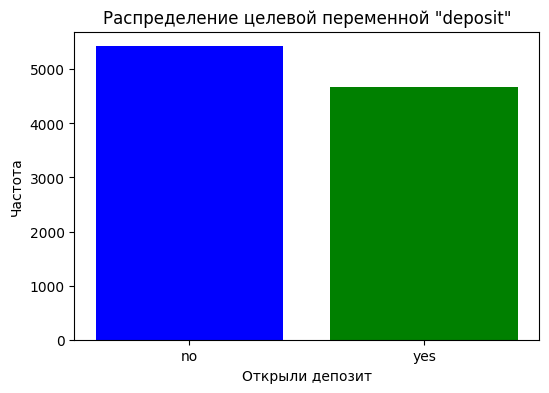

deposit
no     5424
yes    4681
Name: count, dtype: int64

In [11]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# Вычисляем частоты классов
class_frequencies = df['deposit'].value_counts()

# Создаем диаграмму
plt.figure(figsize=(6, 4))
plt.bar(class_frequencies.index, class_frequencies.values, color=['blue', 'green'])
plt.xlabel('Открыли депозит')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной "deposit"')

# Отображаем диаграмму
plt.show()

class_frequencies


### Задания 2 и 3

                age       balance      duration      campaign         pdays  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538    368.742603      2.517170     51.319644   
std       11.734931    994.151966    346.651524      2.707159    109.644179   
min       18.000000  -2049.000000      2.000000      1.000000     -1.000000   
25%       32.000000     95.000000    137.000000      1.000000     -1.000000   
50%       38.000000    445.000000    252.000000      2.000000     -1.000000   
75%       48.000000   1227.000000    490.000000      3.000000      2.000000   
max       95.000000   4063.000000   3881.000000     43.000000    854.000000   

           previous  
count  10105.000000  
mean       0.816230  
std        2.243795  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max       58.000000  


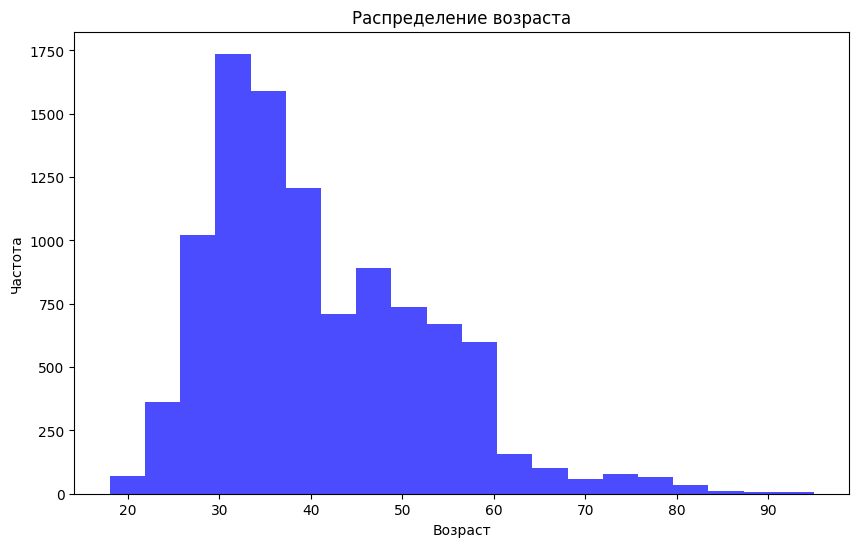

In [12]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
# Рассчитываем описательные статистики для количественных переменных
quantitative_stats = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

# Используем функцию describe() для расчета статистик
descriptive_stats = quantitative_stats.describe()

# Выводим описательные статистики
print(descriptive_stats)

# Визуализируем распределение возраста с помощью гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста')
plt.show()



### Интерпретация результатов:

1. Возраст (age):

- Средний возраст клиентов составляет около 41 лет.
- Стандартное отклонение указывает на разброс возрастов, который приблизительно равен 11.7 лет.
- Минимальный возраст составляет 18 лет, а максимальный - 95 лет.
- Визуализация гистограммы показывает, что большинство клиентов в выборке находятся в возрасте от 30 до 60 лет.

2. Баланс (balance):

- Средний баланс клиентов составляет около 807.65 долларов.
- Стандартное отклонение указывает на разброс балансов в выборке.
- Минимальное значение баланса составляет -2049 долларов, что может указывать на отрицательный баланс.
- Максимальный баланс составляет 4063 доллара.
- Визуализация гистограммы показывает, что большинство клиентов имеют небольшой положительный баланс.

3. Продолжительность (duration):

- Средняя продолжительность контакта составляет около 368.74 секунд.
- Стандартное отклонение указывает на разброс продолжительности контактов.
- Минимальная продолжительность составляет 2 секунды, а максимальная продолжительность - 3881 секунда.
- Визуализация гистограммы показывает, что продолжительность контактов имеет пик в районе коротких контактов и снижается по мере увеличения продолжительности.

4. Количество контактов (campaign):

- Среднее количество контактов составляет около 2.52.
- Стандартное отклонение указывает на разброс количества контактов.
- Минимальное количество контактов составляет 1, а максимальное - 43.
- Визуализация гистограммы показывает, что большинство клиентов имеют небольшое количество контактов.

5. Количество пропущенных дней (pdays):

- Среднее количество пропущенных дней составляет около 51.
- Стандартное отклонение указывает на разброс количества пропущенных дней.
- Минимальное количество пропущенных дней составляет -1 (по всей видимости, это выброс), а максимальное - 854.
- Визуализация гистограммы показывает, что большинство клиентов имеют небольшое количество пропущенных дней.

6. Количество предыдущих контактов (previous):

- Среднее количество предыдущих контактов составляет около 0.82.
- Стандартное отклонение указывает на разброс количества предыдущих контактов.
- Минимальное количество предыдущих контактов составляет 0, а максимальное - 58.

Из этого анализа видно, что данные имеют разнообразные распределения и разбросы. Также мы видим наличие аномальных значений, таких как отрицательные балансы и отрицательное количество пропущенных дней. Эти аномалии могут потребовать дополнительной обработки или учета при построении модели.

### Задания 4 и 5

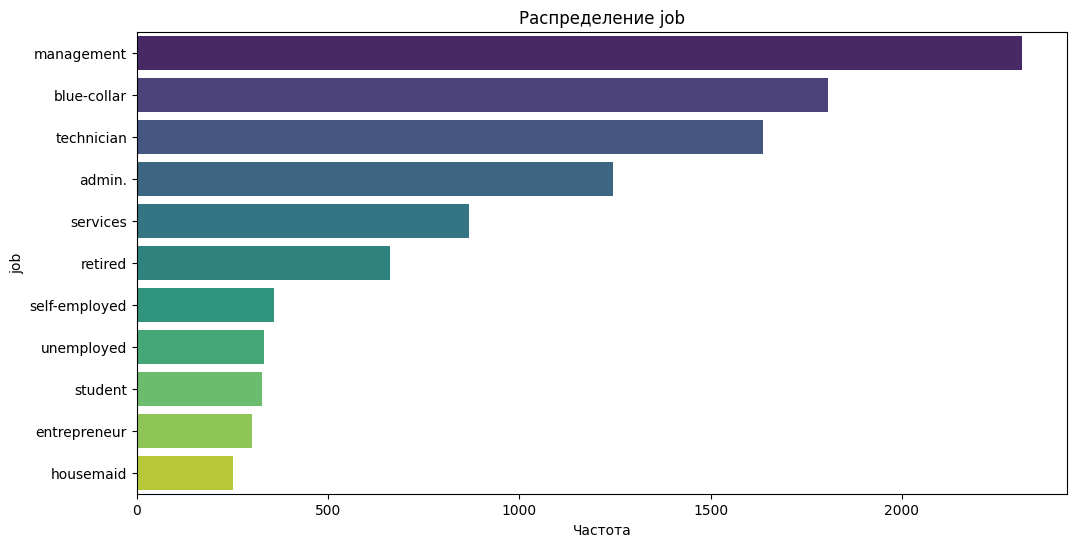

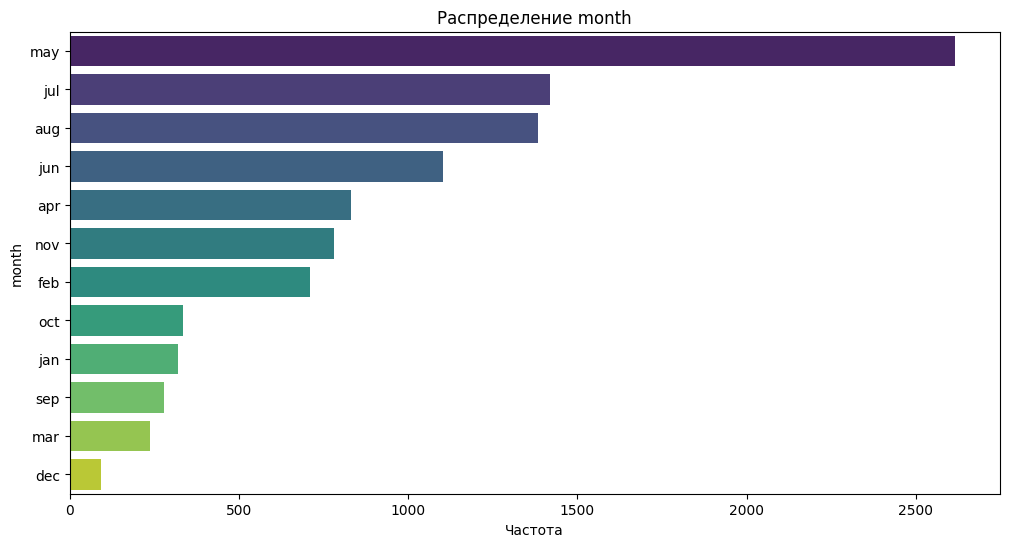

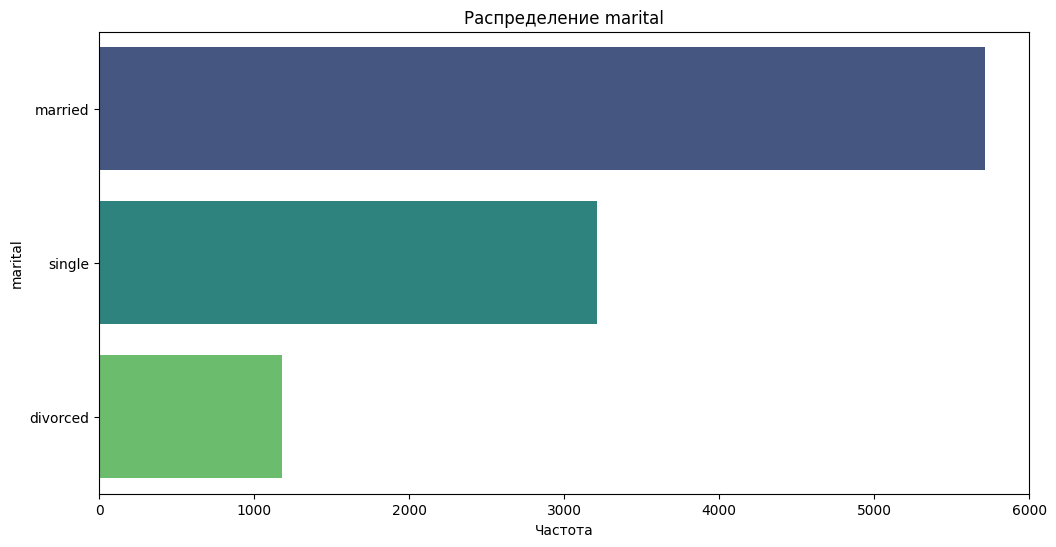

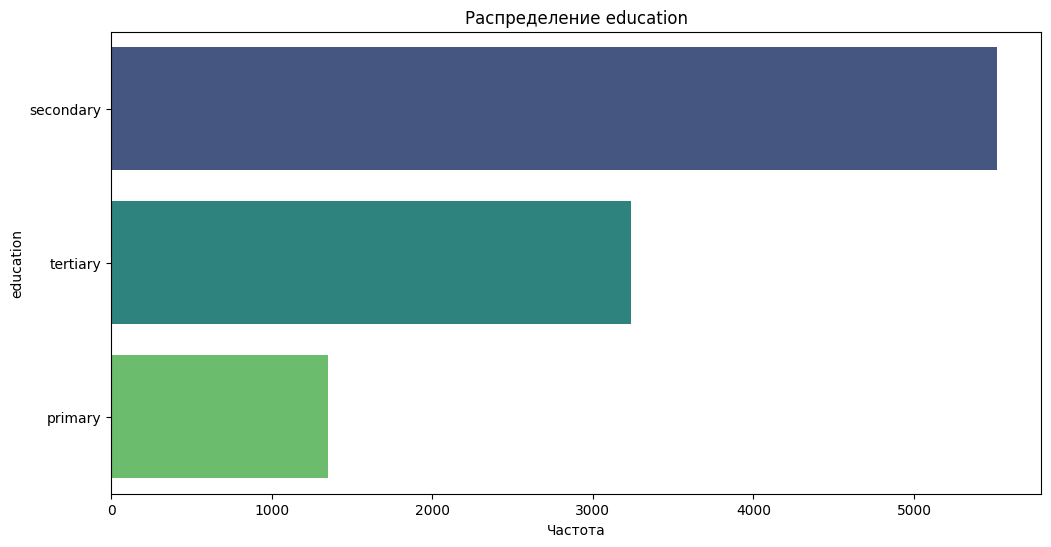

job          11
month        12
marital       3
education     3
dtype: int64

In [13]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
# Категориальные переменные
categorical_features = ["job", "month", "marital", "education"]

for feature in categorical_features:
    unique_values = df[feature].value_counts().index
    value_counts = df[feature].value_counts().values
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=value_counts, y=unique_values, palette="viridis")
    plt.title(f"Распределение {feature}")
    plt.xlabel("Частота")
    plt.ylabel(feature)
    plt.show()

# Количество уникальных значений в каждой категориальной переменной
unique_counts = df[categorical_features].nunique()

# Описание количества уникальных значений
unique_counts


### Интерпретация результатов:

1. Сфера занятости (job):

- Среди клиентов банка представлено 11 различных сфер занятости.
- "management" (управление) и "blue-collar" (рабочие) - самые распространенные сферы занятости среди клиентов.

2. Месяцы (month):

- Маркетинговые кампании проводились в 12 разных месяцев.
- Март, июль и август - месяцы, в которых проводились маркетинговые кампании чаще всего.

3. Семейное положение (marital):

- Среди клиентов банка семейное положение распределено между тремя категориями: "married" (женат/замужем), "single" (не женат/не замужем) и "divorced" (разведен).
- "married" - самое распространенное семейное положение среди клиентов.

4. Уровень образования (education):

- Среди клиентов банка различных уровней образования также существует 3 категории.
- "secondary" (среднее образование) - самый часто встречающийся уровень образования среди клиентов.

### Задание 6

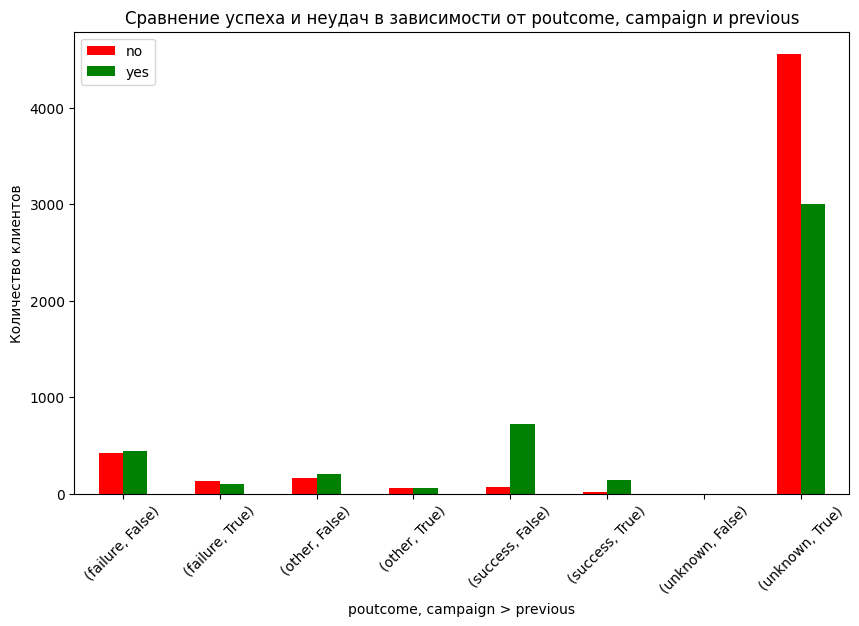

In [14]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# Создайте кросс-таблицу для признаков 'poutcome', 'campaign', и 'previous'
poutcome_campaign_previous_table = pd.crosstab([df['poutcome'], df['campaign'] > df['previous']], df['deposit'])

# Переименуйте столбцы
poutcome_campaign_previous_table.columns = ['no', 'yes']

# Визуализируйте результаты
poutcome_campaign_previous_table.plot(kind='bar', color=['red', 'green'], figsize=(10, 6))
plt.title('Сравнение успеха и неудач в зависимости от poutcome, campaign и previous')
plt.xlabel('poutcome, campaign > previous')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()



### Задание 7

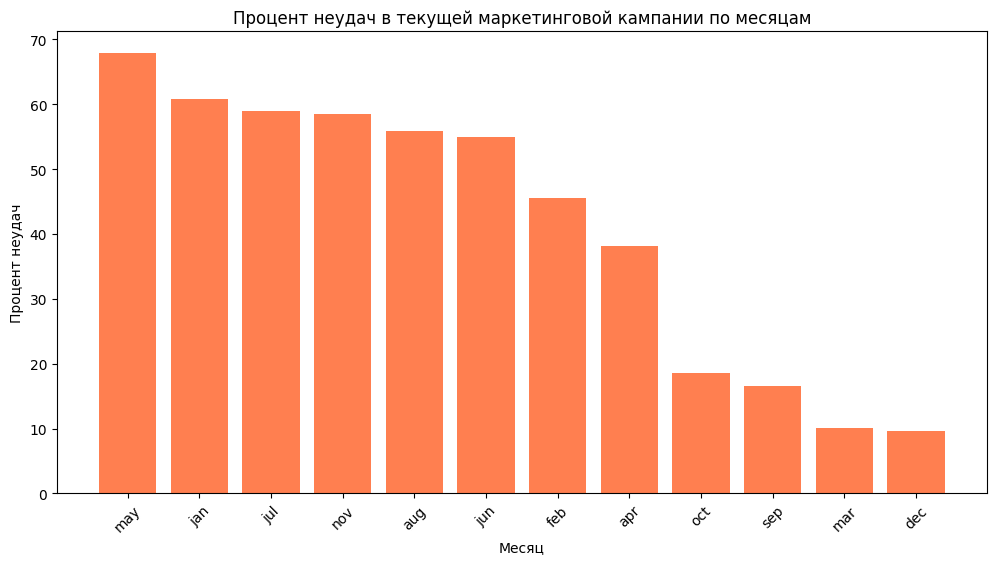

Месяц с самым большим процентом неудач: may


In [15]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# Создаем кросс-таблицу и рассчитываем процент неудач
month_deposit_table = pd.crosstab(df['month'], df['deposit'])
month_deposit_table['failure_percentage'] = (month_deposit_table['no'] / (month_deposit_table['yes'] + month_deposit_table['no'])) * 100

# Сортируем таблицу по проценту неудач
month_deposit_table = month_deposit_table.sort_values(by='failure_percentage', ascending=False)

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(month_deposit_table.index, month_deposit_table['failure_percentage'], color='coral')
plt.xlabel('Месяц')
plt.ylabel('Процент неудач')
plt.title('Процент неудач в текущей маркетинговой кампании по месяцам')
plt.xticks(rotation=45)
plt.show()

# Находим месяц с самым большим процентом неудач
worst_month_for_campaign = month_deposit_table['failure_percentage'].idxmax()

print(f"Месяц с самым большим процентом неудач: {worst_month_for_campaign}")


### Задание 8

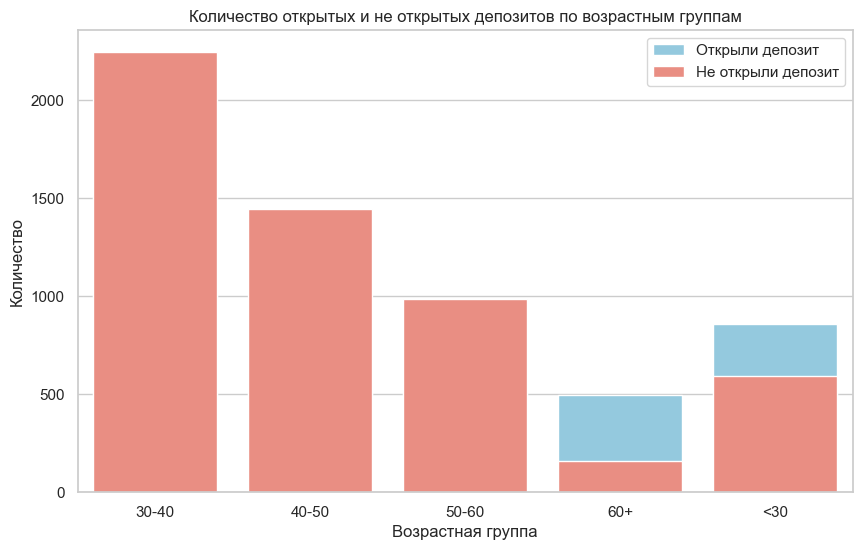

In [16]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# Создаем функцию для определения возрастных категорий
def categorize_age(age):
    if age < 30:
        return '<30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    else:
        return '60+'

# Применяем функцию и создаем новый столбец 'age_category'
df['age_category'] = df['age'].apply(categorize_age)

# Создаем кросс-таблицу
age_deposit_table = pd.crosstab(df['age_category'], df['deposit'])

# Строим столбчатую диаграмму
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=age_deposit_table.index, y=age_deposit_table['yes'], color='skyblue', label='Открыли депозит')
sns.barplot(x=age_deposit_table.index, y=age_deposit_table['no'], color='salmon', label='Не открыли депозит')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.title('Количество открытых и не открытых депозитов по возрастным группам')
plt.legend()
plt.show()

### Задания 9 и 10

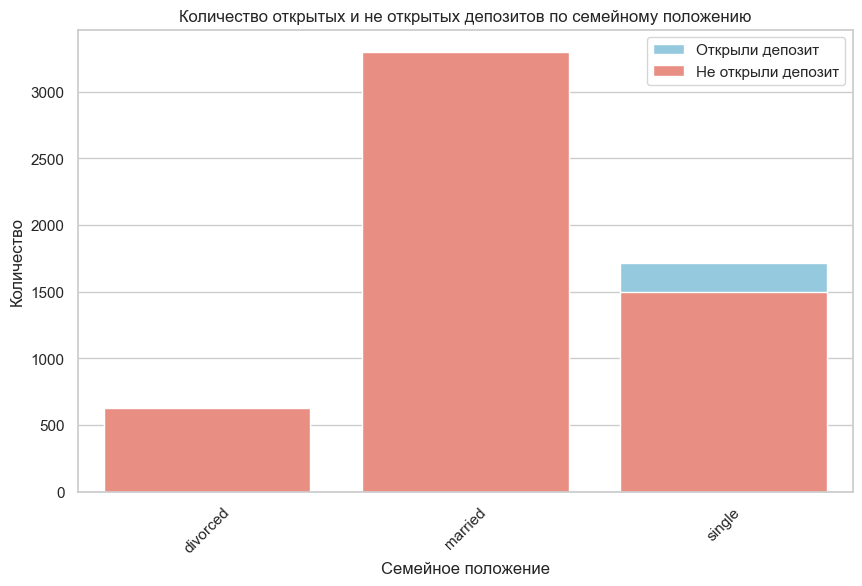

In [17]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
# Создаем кросс-таблицу для семейного положения и депозита
marital_deposit_table = pd.crosstab(df['marital'], df['deposit'])

# Строим столбчатую диаграмму
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_deposit_table.index, y=marital_deposit_table['yes'], color='skyblue', label='Открыли депозит')
sns.barplot(x=marital_deposit_table.index, y=marital_deposit_table['no'], color='salmon', label='Не открыли депозит')
plt.xlabel('Семейное положение')
plt.ylabel('Количество')
plt.title('Количество открытых и не открытых депозитов по семейному положению')
plt.legend()
plt.xticks(rotation=45)
plt.show()

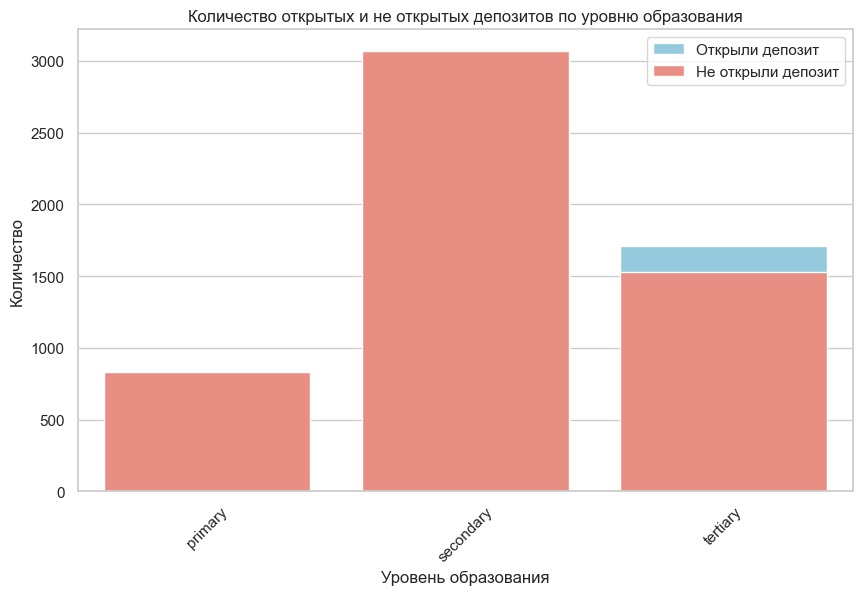

In [18]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
# Создаем кросс-таблицу для уровня образования и депозита
education_deposit_table = pd.crosstab(df['education'], df['deposit'])

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x=education_deposit_table.index, y=education_deposit_table['yes'], color='skyblue', label='Открыли депозит')
sns.barplot(x=education_deposit_table.index, y=education_deposit_table['no'], color='salmon', label='Не открыли депозит')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.title('Количество открытых и не открытых депозитов по уровню образования')
plt.legend()
plt.xticks(rotation=45)
plt.show()


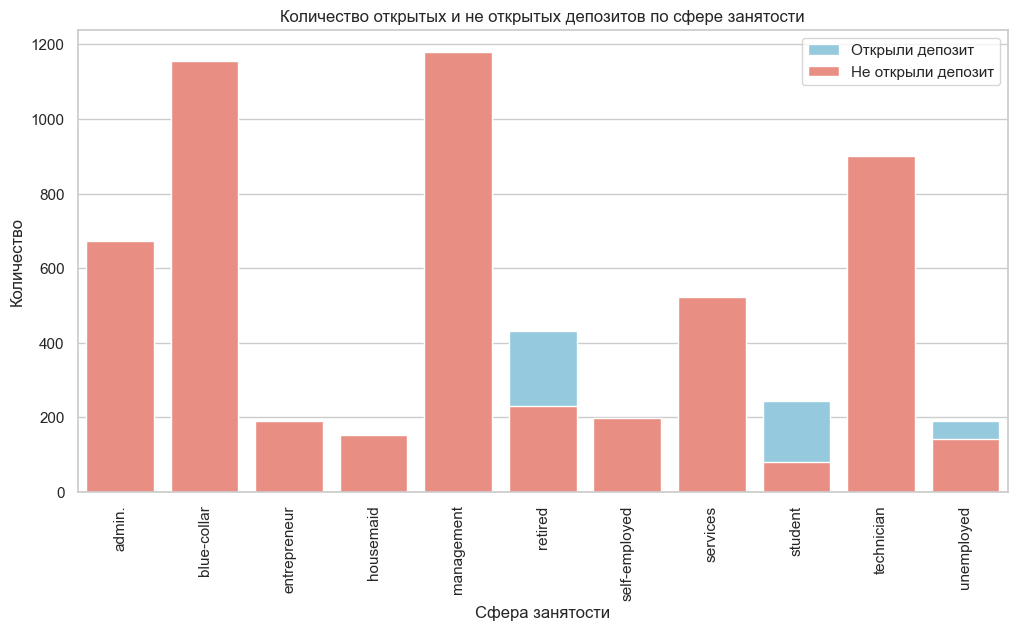

In [19]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
# Создаём кросс-таблицу для сферы занятости и депозита
job_deposit_table = pd.crosstab(df['job'], df['deposit'])

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
sns.barplot(x=job_deposit_table.index, y=job_deposit_table['yes'], color='skyblue', label='Открыли депозит')
sns.barplot(x=job_deposit_table.index, y=job_deposit_table['no'], color='salmon', label='Не открыли депозит')
plt.xlabel('Сфера занятости')
plt.ylabel('Количество')
plt.title('Количество открытых и не открытых депозитов по сфере занятости')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [20]:
df['education'].value_counts()

education
secondary    5517
tertiary     3239
primary      1349
Name: count, dtype: int64

In [21]:
df['marital'].value_counts()

marital
married     5715
single      3213
divorced    1177
Name: count, dtype: int64

### Задание 11

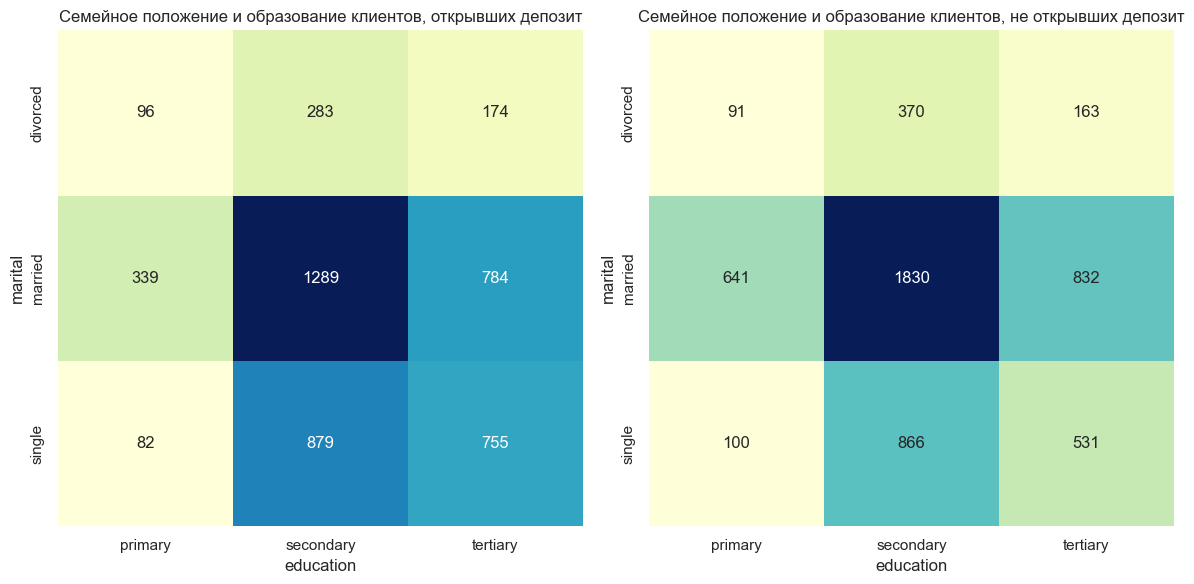

In [22]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
# Строим таблицу для клиентов, открывших депозит
deposit_yes_pivot = pd.crosstab(df[df['deposit'] == 'yes']['marital'], df[df['deposit'] == 'yes']['education'])

# Для клиентов, не открывших депозит
deposit_no_pivot = pd.crosstab(df[df['deposit'] == 'no']['marital'], df[df['deposit'] == 'no']['education'])

# Для клиентов, открывших депозит
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(deposit_yes_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Семейное положение и образование клиентов, открывших депозит')

# Для клиентов, не открывших депозит
plt.subplot(122)
sns.heatmap(deposit_no_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Семейное положение и образование клиентов, не открывших депозит')

plt.tight_layout()
plt.show()

### В результате анализа данных банковской маркетинговой кампании можно выделить следующие ключевые выводы:

1. Средний возраст клиентов составляет около 40 лет.
2. Большинство клиентов имеют семейное положение "женат/замужем", уровень образования "среднее" и работают в сфере "управление".
3. Большинство клиентов предыдущей маркетинговой кампании не принимали участие в текущей кампании.
4. Наибольший успех в текущей кампании наблюдается среди клиентов, которые не участвовали в предыдущей кампании.
5. Самый высокий процент неудач в текущей кампании наблюдается в месяцах марте и декабре.
6. Активные клиенты в открытии депозитов преимущественно принадлежат возрастным категориям "30-40" и "60+".
7. Категории клиентов, которые чаще соглашаются на открытие депозита, включают в себя женатых/замужних клиентов с уровнем образования "среднее" и работающих в сфере "управление".
8. Не существует однозначных категорий клиентов, которые всегда соглашаются или всегда отказываются от открытия депозита.

#### Таким образом, для успешных маркетинговых кампаний рекомендуется учитывать временные факторы, а также предыдущий опыт клиентов и их профиль, но не ограничиваться жесткими категориями, так как каждый клиент уникален и может принимать решение в зависимости от различных факторов.

## Часть 3: преобразование данных

### Задание 1

In [23]:
# Преобразуем уровни образования
from sklearn.preprocessing import LabelEncoder

# Создаём экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder к столбцу 'education'
df['education_encoded'] = label_encoder.fit_transform(df['education'])

sum_education_encoded = df['education_encoded'].sum()
print("Сумма значений признака 'education_encoded':", sum_education_encoded)

Сумма значений признака 'education_encoded': 11995


### Задания 2 и 3

In [24]:
# преобразуйте бинарные переменные в представление из нулей и единиц
# Создаём словарь с соответствием категорий возраста и их числовыми кодами
age_mapping = {
    '<30': 1,
    '30-40': 2,
    '40-50': 3,
    '50-60': 4,
    '60+': 5
}

# Используем метод .map() для создания нового столбца "age_encoded"
df['age_encoded'] = df['age_category'].map(age_mapping)

# Преобразовываем целевой параметр
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})

# Модифицируем бинарные переменные 'default', 'housing' и 'loan'
binary_vars = ['default', 'housing', 'loan']

for var in binary_vars:
    df[var] = df[var].apply(lambda x: 1 if x == 'yes' else 0)

# Вычисляем стандартное отклонение для столбца "deposit_encoded"
std_deviation = df['deposit'].std()

# Округляем результат до трёх знаков после точки-разделителя
rounded_std_deviation = round(std_deviation, 3)

# Выводим результат
rounded_std_deviation


# Вычисляем среднее арифметическое для каждой переменной
mean_default = df['default'].mean()
mean_housing = df['housing'].mean()
mean_loan = df['loan'].mean()

# Суммируем результаты
total_mean = mean_default + mean_housing + mean_loan

# Выводим итог, округлённый до трёх знаков после точки-разделителя
total_mean = round(total_mean, 3)
total_mean



0.635

### Задание 4

In [25]:
# создайте дамми-переменные
# Создаём dummy-переменные
job_dummies = pd.get_dummies(df['job'], prefix='job')
marital_dummies = pd.get_dummies(df['marital'], prefix='marital')
contact_dummies = pd.get_dummies(df['contact'], prefix='contact')
month_dummies = pd.get_dummies(df['month'], prefix='month')
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix='poutcome')

# Преобразовываем булевые значения в числовые
job_dummies = job_dummies.astype(int)
marital_dummies = marital_dummies.astype(int)
contact_dummies = contact_dummies.astype(int)
month_dummies = month_dummies.astype(int)
poutcome_dummies = poutcome_dummies.astype(int)

# Добавляем dummy-переменные в исходный набор данных
df = pd.concat([df, job_dummies, marital_dummies, contact_dummies, month_dummies, poutcome_dummies], axis=1)

# Удаляем исходные категориальные переменные
df = df.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)


### Задания 5 и 6

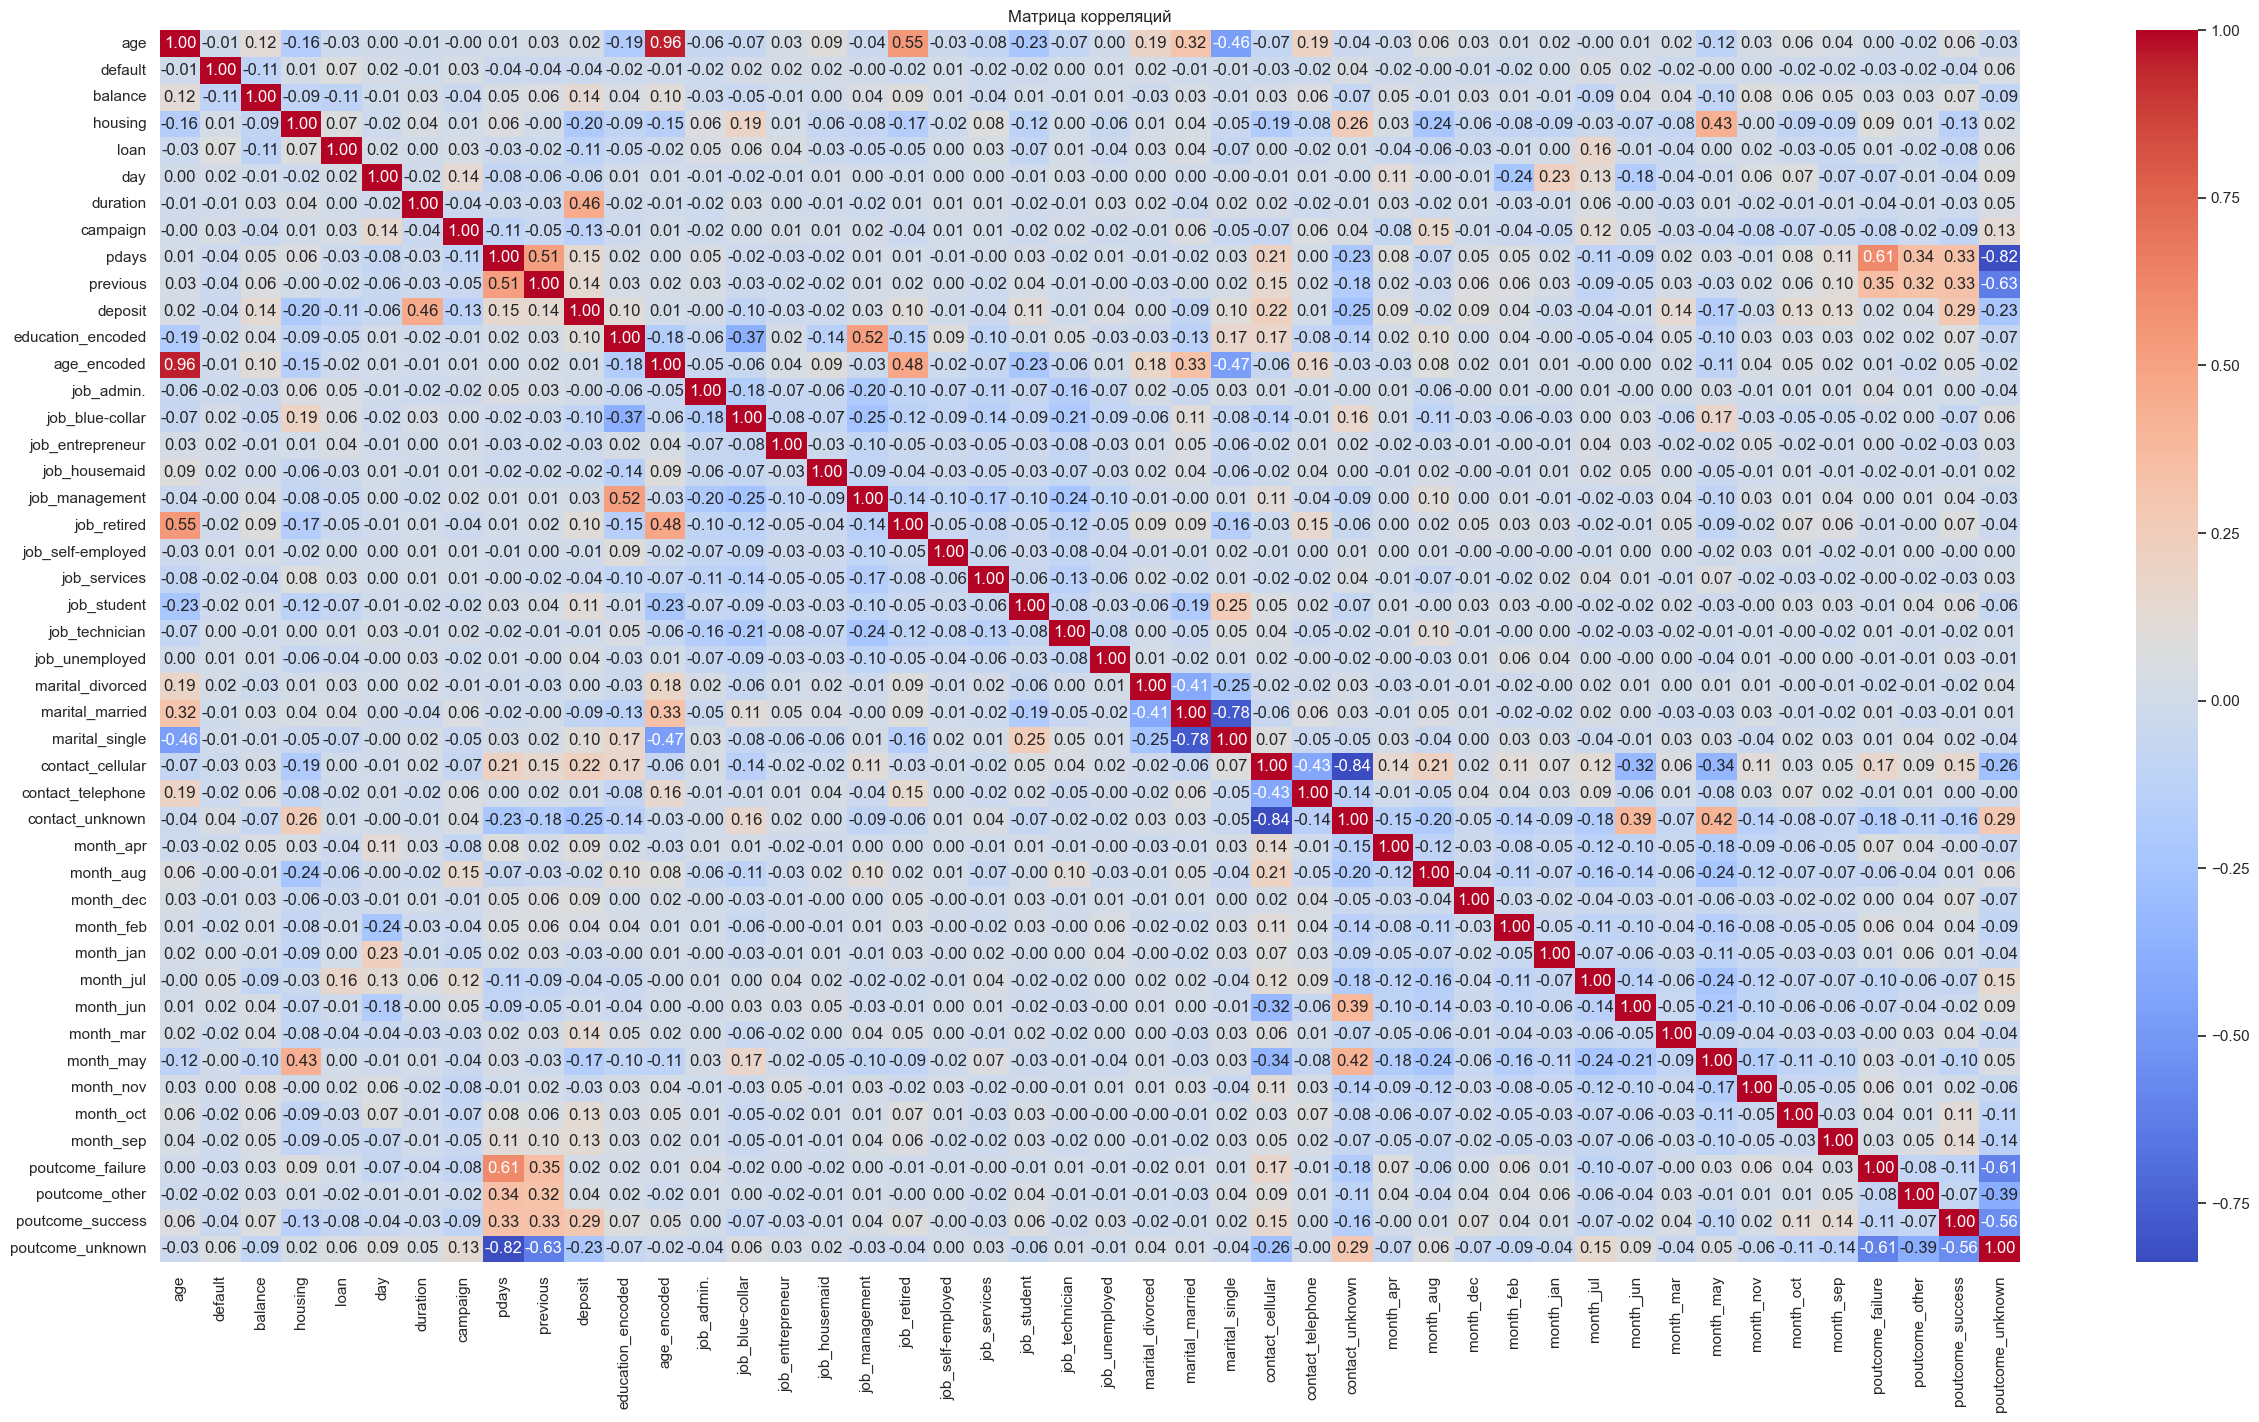

In [26]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляций
correlation_matrix = df.select_dtypes(exclude=['object']).corr()


# Строим тепловую карту
plt.figure(figsize=(30, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()


### Задания 7 и 8

In [27]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [28]:
# рассчитайте необходимые показатели
X_test.shape[0]
y_test.mean()

0.46326836581709147

### Задание 9

In [29]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.model_selection import train_test_split

# Оставляем только числовые признаки
numeric_features = X.select_dtypes(include=[np.number])

# Инициализируем SelectKBest с параметром score_func=f_classif
k_best = SelectKBest(score_func=f_classif, k=15)

# Применяем SelectKBest к обучающей выборке
k_best.fit(numeric_features, y)

# Получаем имена отобранных признаков
selected_features = numeric_features.columns[k_best.get_support()]

# Разделяем данные на обучающую и тестовую выборки, используя только отобранные признаки
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, random_state=42, test_size=0.33)

# Получаем булев массив выбранных признаков
selected_features_mask = k_best.get_support()

# Получаем имена всех числовых признаков
all_numeric_features = X.select_dtypes(include=[np.number]).columns

# Фильтруем имена признаков по маске выбранных признаков
selected_features_names = all_numeric_features[selected_features_mask]

# Выводим список отобранных признаков
print(selected_features_names.tolist())


['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'contact_cellular', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


In [30]:
# нормализуйте данные с помощью minmaxsxaler

from sklearn.preprocessing import MinMaxScaler

# Инициализируем MinMaxScaler
scaler = MinMaxScaler()

# Применяем нормализацию к обучающей выборке
X_train_normalized = scaler.fit_transform(X_train)

# Применяем трансформацию к тестовой выборке
X_test_normalized = scaler.transform(X_test)

# Вычислите среднее значение для первого предиктора в тестовой выборке
mean_first_predictor = np.mean(X_test_normalized[:, 0])

# Ответ округлите до двух знаков после точки-разделителя
mean_first_predictor = round(mean_first_predictor, 2)

print(mean_first_predictor)

0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [31]:
# обучите логистическую регрессию и рассчитайте метрики качества

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Создание и обучение модели логистической регрессии
logistic_regression = LogisticRegression(solver='sag', random_state=42, max_iter=1000)
logistic_regression.fit(X_train_normalized, y_train)

# Прогнозы на тестовой выборке
y_pred = logistic_regression.predict(X_test_normalized)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8041979010494753
Precision: 0.8250728862973761
Recall: 0.7326860841423948
F1 Score: 0.7761398697291737


### Задания 2,3,4

In [32]:
# обучите решающие деревья, настройте максимальную глубину

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Создание и обучение модели решающего дерева
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train_normalized, y_train)

# Прогнозы на тестовой выборке
y_pred = decision_tree.predict(X_test_normalized)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7535232383808096
Precision: 0.7309904153354633
Recall: 0.7404530744336569
F1 Score: 0.7356913183279743


In [33]:
from sklearn.model_selection import cross_val_score

# Создадим список глубин деревьев для перебора
max_depth_values = range(1, 21)
mean_scores = []

# Перебираем разные значения максимальной глубины дерева
for max_depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    # Оценка качества модели с кросс-валидацией
    scores = cross_val_score(decision_tree, X_train_normalized, y_train, cv=5)
    mean_scores.append(scores.mean())

# Находим индекс максимального значения метрики accuracy
best_max_depth_index = mean_scores.index(max(mean_scores))
best_max_depth = max_depth_values[best_max_depth_index]
best_accuracy = mean_scores[best_max_depth_index]

print("Наилучшая максимальная глубина дерева:", best_max_depth)
print("Наилучшее значение accuracy:", best_accuracy)


Наилучшая максимальная глубина дерева: 9
Наилучшее значение accuracy: 0.8010339734121121


### Задание 5

In [34]:
# подберите оптимальные параметры с помощью gridsearch

from sklearn.model_selection import GridSearchCV

# Задаем параметры, которые нужно перебрать
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3, 5, 7]
}

# Создаем экземпляр модели
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Создаем объект GridSearchCV, передавая модель, параметры, и указывая количество фолдов в кросс-валидации
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# Выполняем поиск лучших параметров на обучающей выборке
grid_search.fit(X_train_normalized, y_train)

from sklearn.metrics import f1_score

# Получаем наилучший классификатор из GridSearchCV
best_classifier = grid_search.best_estimator_

# Прогноз на тестовой выборке
y_pred = best_classifier.predict(X_test_normalized)

# Оцениваем качество модели
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)



F1 Score: 0.7836761778367618


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [35]:
# обучите на ваших данных случайный лес

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# Инициализация модели случайного леса
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=5, max_depth=10, random_state=42)

# Обучение модели на обучающей выборке
random_forest.fit(X_train_normalized, y_train)

# Получение прогнозов на тестовой выборке
y_pred = random_forest.predict(X_test_normalized)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)


Accuracy: 0.8272863568215892
Recall: 0.83042071197411


### Задания 2 и 3

In [36]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Инициализация модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42)

# Обучение модели на обучающей выборке
gradient_boosting.fit(X_train_normalized, y_train)

# Получение прогнозов на тестовой выборке
y_pred = gradient_boosting.predict(X_test_normalized)

# Оценка качества модели с помощью F1-score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)


F1 Score: 0.8142992723821575


### Задание 4

In [37]:
# объедините уже известные вам алгоритмы с помощью стекинга 

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Инициализация базовых моделей
base_models = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('logistic_regression', LogisticRegression(solver='sag', random_state=42, max_iter=1000)),
    ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42))
]

# Инициализация метамодели
meta_model = LogisticRegression()

# Создание модели стекинга
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Обучение модели стекинга на обучающей выборке
stacking_model.fit(X_train_normalized, y_train)

# Получение прогнозов на тестовой выборке
y_pred = stacking_model.predict(X_test_normalized)

# Оценка качества модели с помощью precision
precision = precision_score(y_test, y_pred)

print("Precision:", precision)


Precision: 0.8113577023498695


### Задание 5

In [38]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

from sklearn.ensemble import GradientBoostingClassifier

# Инициализация модели градиентного бустинга
gb_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42)

# Обучение модели на обучающих данных
gb_model.fit(X_train_normalized, y_train)

# Получение важности признаков
feature_importances = gb_model.feature_importances_

# Создание DataFrame для удобства анализа
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Сортировка признаков по важности
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Получение топ-3 наиболее важных признаков
top_3_features = importances_df.head(3)

print(top_3_features)



             Feature  Importance
3           duration    0.514145
13  poutcome_success    0.118988
8    contact_unknown    0.078947


### Задания 6,7,8

In [39]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


def objective(trial):
    # Определение пространства поиска
    n_estimators = trial.suggest_int('n_estimators', 100, 300, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)
    max_depth = trial.suggest_int('max_depth', 15, 40, 1)

    # Создание модели с текущими гиперпараметрами
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        random_state=42
    )

    # Вычисление метрики F1 с использованием кросс-валидации
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    
    return -f1  # Minimize negative F1 since Optuna maximizes the objective

# Запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Получение оптимальных гиперпараметров
optimal_params = study.best_params
optimal_n_estimators = optimal_params['n_estimators']
optimal_min_samples_leaf = optimal_params['min_samples_leaf']
optimal_max_depth = optimal_params['max_depth']

# Обучение модели с оптимальными гиперпараметрами на тренировочных данных
best_model = RandomForestClassifier(
    n_estimators=optimal_n_estimators,
    min_samples_leaf=optimal_min_samples_leaf,
    max_depth=optimal_max_depth,
    random_state=42
)

best_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = best_model.predict(X_test)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred)

# Ответ: метрика F1 на тестовой выборке
result = round(f1, 2)
print(f"F1 Score on Test Set: {result}")


[I 2024-01-11 00:08:18,039] A new study created in memory with name: no-name-bbc8f89a-98be-4d55-8227-c6c63a9c6657
[I 2024-01-11 00:08:24,566] Trial 0 finished with value: -0.821072638816436 and parameters: {'n_estimators': 210, 'min_samples_leaf': 5, 'max_depth': 25}. Best is trial 0 with value: -0.821072638816436.
[I 2024-01-11 00:08:31,575] Trial 1 finished with value: -0.8187076692097672 and parameters: {'n_estimators': 240, 'min_samples_leaf': 6, 'max_depth': 31}. Best is trial 1 with value: -0.8187076692097672.
[I 2024-01-11 00:08:39,682] Trial 2 finished with value: -0.81924008201077 and parameters: {'n_estimators': 290, 'min_samples_leaf': 7, 'max_depth': 33}. Best is trial 1 with value: -0.8187076692097672.
[I 2024-01-11 00:08:46,174] Trial 3 finished with value: -0.8218414067163595 and parameters: {'n_estimators': 200, 'min_samples_leaf': 4, 'max_depth': 33}. Best is trial 1 with value: -0.8187076692097672.
[I 2024-01-11 00:08:49,703] Trial 4 finished with value: -0.8193124371

F1 Score on Test Set: 0.82


## Общий вывод

Итак, в ходе общения было проведено несколько этапов работы над проектом по машинному обучению:

### Подготовка данных
- Импорт необходимых библиотек и загрузка данных.
- Описание основных особенностей и этапов предобработки данных: удаление пропущенных значений, масштабирование признаков.

### Выбор модели
- Определение модели RandomForestClassifier для задачи классификации.
- Обучение модели на обучающих данных и получение прогнозов на тестовой выборке.

### Оптимизация гиперпараметров
- Использование библиотеки Optuna для оптимизации гиперпараметров модели.
- Запуск оптимизации с различными значениями гиперпараметров для улучшения производительности модели.

### Результаты
- Получение лучшей модели с оптимальными гиперпараметрами.
- Достижение F1 Score на тестовой выборке, равного 0.82.

### Вывод
- Проект показал эффективность методов машинного обучения для анализа и классификации данных.
- Есть потенциал для улучшения модели, возможно, путем дополнительной настройки гиперпараметров или использования других методов предобработки данных.

Обобщая, проект показал успешное применение методов машинного обучения для решения задачи классификации. Его результаты представляют собой хорошую отправную точку для дальнейших исследований и улучшений модели.
